# Object

# Collecting the data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [46]:
df=pd.read_csv(r"D:\Board Infinity\ML_Project\Logistic Regression SUV marketing\suv_data.csv")

In [47]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [48]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

# Analyzing the data


<AxesSubplot:xlabel='Gender', ylabel='count'>

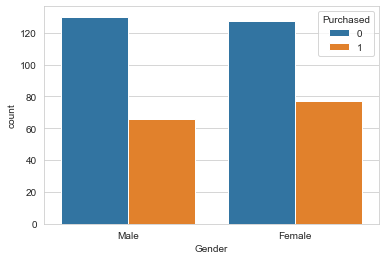

In [49]:
#Finding the relation between Gender and past Purchased
sns.set_style('whitegrid')
sns.countplot(x=df.Gender,hue=df.Purchased,data=df)

C:\Users\swapn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

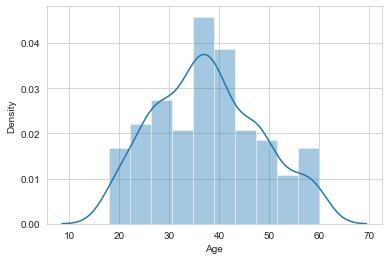

In [50]:
sns.distplot(df['Age'].dropna())

<AxesSubplot:ylabel='Frequency'>

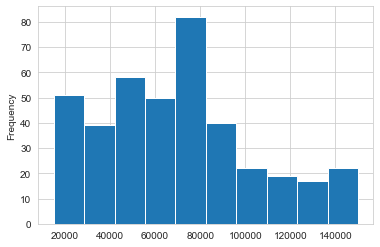

In [51]:
#Here we are checking for the salary distribution in the dataset
df['EstimatedSalary'].plot.hist()

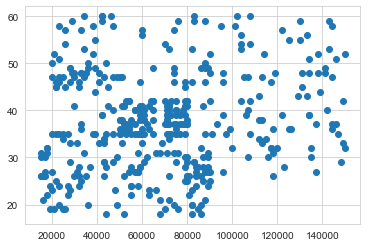

In [52]:
#Here we are finding the relation between the EstimatedSalary and Age 
plt.scatter(x=df['EstimatedSalary'],y=df['Age'])
plt.show()

# Data Wrangling

<AxesSubplot:>

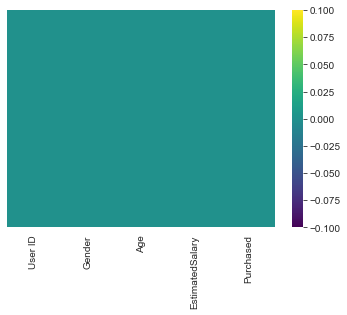

In [53]:
#checking for null values in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [54]:
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'Gender'. 
df['Gender']= label_encoder.fit_transform(df['Gender']) 
df['Gender'].unique() 
#Male is 1 and Female as 0

array([1, 0])

In [55]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


# Train & Test

In [56]:
X=df.iloc[:,[2,3]].values
#Here we are onyl taking Age and EstiatedSalary 
y=df.iloc[:,4].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

# Prediction Model Building

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr=LogisticRegression(random_state=0)

In [63]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [64]:
y_pred=lr.predict(X_test)

In [65]:
#checking the accuracy
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,y_pred)*100

87.12121212121212

# Conclusion

#So Age and EstimatedSalary are very important to predict the future sales of new SUV.